<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучаем-данные" data-toc-modified-id="Изучаем-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучаем данные</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Делим-на-выборки-и-кодируем" data-toc-modified-id="Делим-на-выборки-и-кодируем-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Делим на выборки и кодируем</a></span></li><li><span><a href="#Масштабируем-признаки" data-toc-modified-id="Масштабируем-признаки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабируем признаки</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-Дерево-решений" data-toc-modified-id="Модель-Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель Дерево решений</a></span></li><li><span><a href="#Модель-Случайный-лес" data-toc-modified-id="Модель-Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель Случайный лес</a></span></li><li><span><a href="#Модель-Логистическая-регрессия" data-toc-modified-id="Модель-Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Указываем-вес-в-нашей-модели" data-toc-modified-id="Указываем-вес-в-нашей-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Указываем вес в нашей модели</a></span></li><li><span><a href="#Увеличиваем-выборку-положительных-ответов-для-баланса" data-toc-modified-id="Увеличиваем-выборку-положительных-ответов-для-баланса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличиваем выборку положительных ответов для баланса</a></span></li><li><span><a href="#Проверяем-уменьшение-выборки" data-toc-modified-id="Проверяем-уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверяем уменьшение выборки</a></span></li><li><span><a href="#Проверяем-изменение-порога" data-toc-modified-id="Проверяем-изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверяем изменение порога</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

### Изучаем данные

In [2]:
data = pd.read_csv('/Users/evgen/OneDrive/Рабочий стол/Моя новая профессия/Проекты/Отток клиентов/Churn.csv')
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Проверка на пропуски и дубликаты**


In [4]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data.duplicated().sum()

0

**Целевым признаком** у нас является столбец Факт ухода клиента **'exited'**.

Столбцы с номером **id**, фамилиями и номером строки нам не нужны для обучения поэтому их **удалим**.

Остальные столбцы у нас являются **признаками**.

Также у нас есть **пропуски** в столбце **кол-во лет в банке**. 

### Предобработка

**Названия столбцов в питоний вид**

In [6]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [7]:
data = data.rename( 
 columns= {'rownumber' : 'row_number', 'customerid' : 'customer_id',
           'creditscore' : 'credit_score', 'numofproducts' : 'num_of_products',
           'hascrcard' : 'has_cr_card', 'isactivemember' : 'is_active_member',
           'estimatedsalary' : 'estimated_salary'})
print(data.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


**Удаляем столбцы с непригодной для нас информацией**

In [8]:
data = data.drop(['row_number', 'surname', 'customer_id'], axis=1)

**Смотрим столбец с кол-вом лет в банке**

In [9]:
display(data.query('tenure.isna()').head(20))

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Скорее всего пропуски связаны с тем что клиент в банке меньше года. Поэтому заполним 0 данные пропуски.

In [10]:
data['tenure'] = data['tenure'].fillna(0)
data.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

**Проверка данных на разброс**

In [11]:
data.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


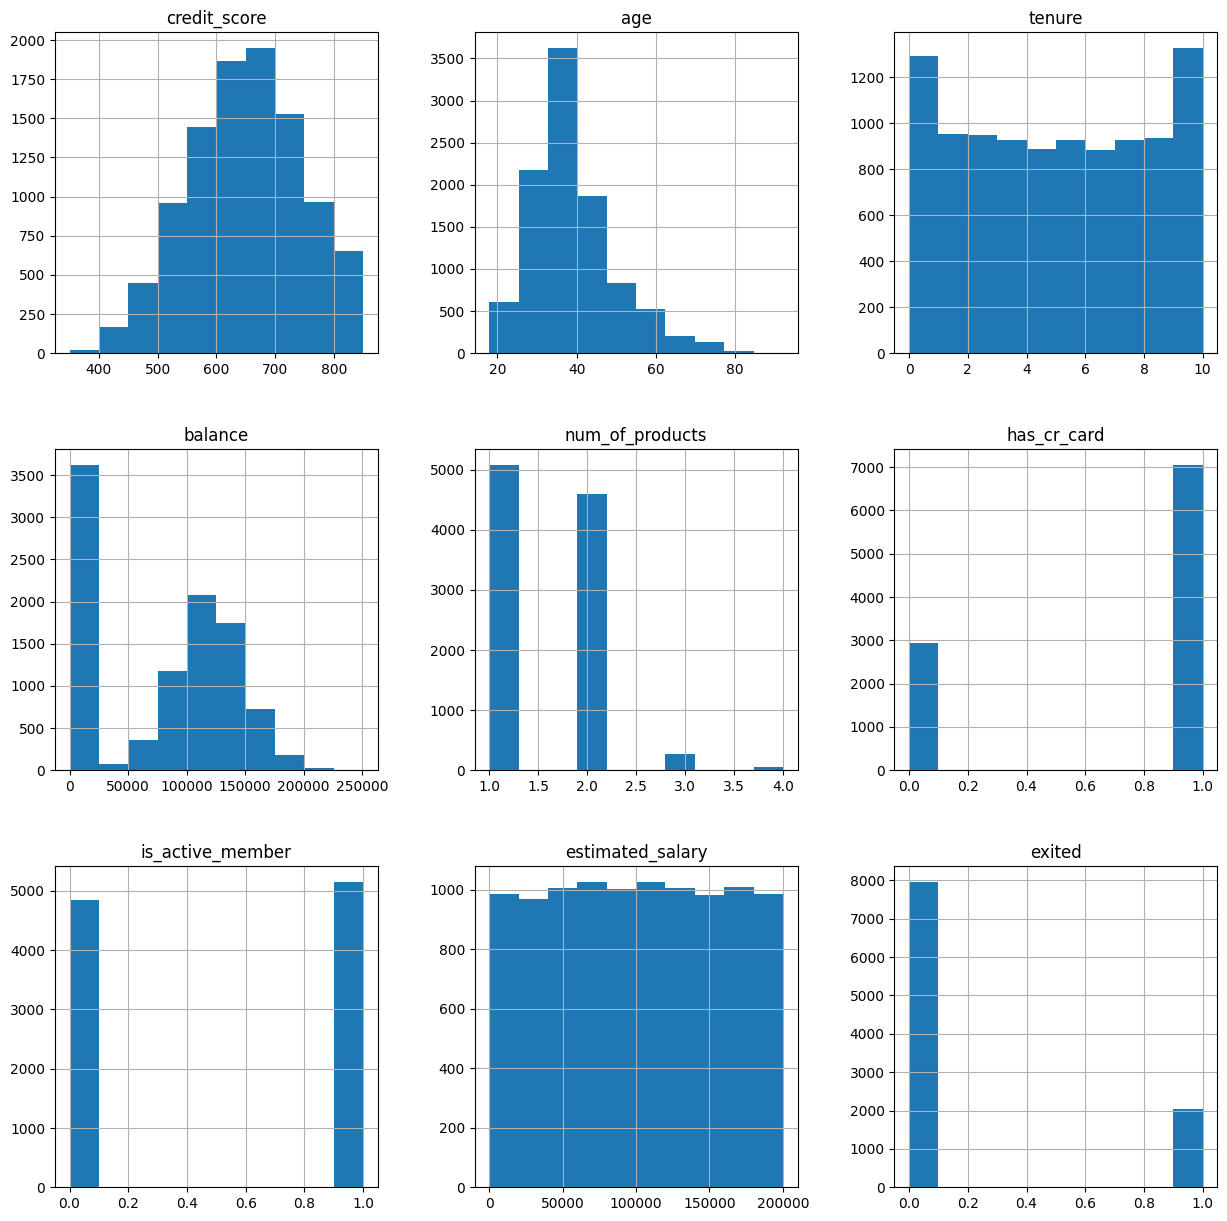

In [12]:
data.hist(figsize=(15,15))
plt.show()

В целом данные вполне нормальные. Посмотрим подробнее столбец с Балансом.

In [13]:
display(data.query('balance == 0').head(10))

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1.0,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7.0,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3.0,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10.0,0.0,2,1,0,26260.98,0
13,549,France,Female,25,5.0,0.0,2,0,0,190857.79,0
14,635,Spain,Female,35,7.0,0.0,2,1,1,65951.65,0
17,549,Spain,Female,24,9.0,0.0,2,1,1,14406.41,0
18,587,Spain,Male,45,6.0,0.0,1,0,0,158684.81,0
19,726,France,Female,24,6.0,0.0,2,1,1,54724.03,0


In [14]:
data['balance'].sort_values(ascending=True).value_counts()

0.00         3617
105473.74       2
130170.82       2
127649.64       1
123105.88       1
             ... 
124213.36       1
80764.03        1
121365.39       1
130181.47       1
139799.63       1
Name: balance, Length: 6382, dtype: int64

В целом ошибок не наблюдается.

**Проверяем зависимость наших признаков на целевой признак**

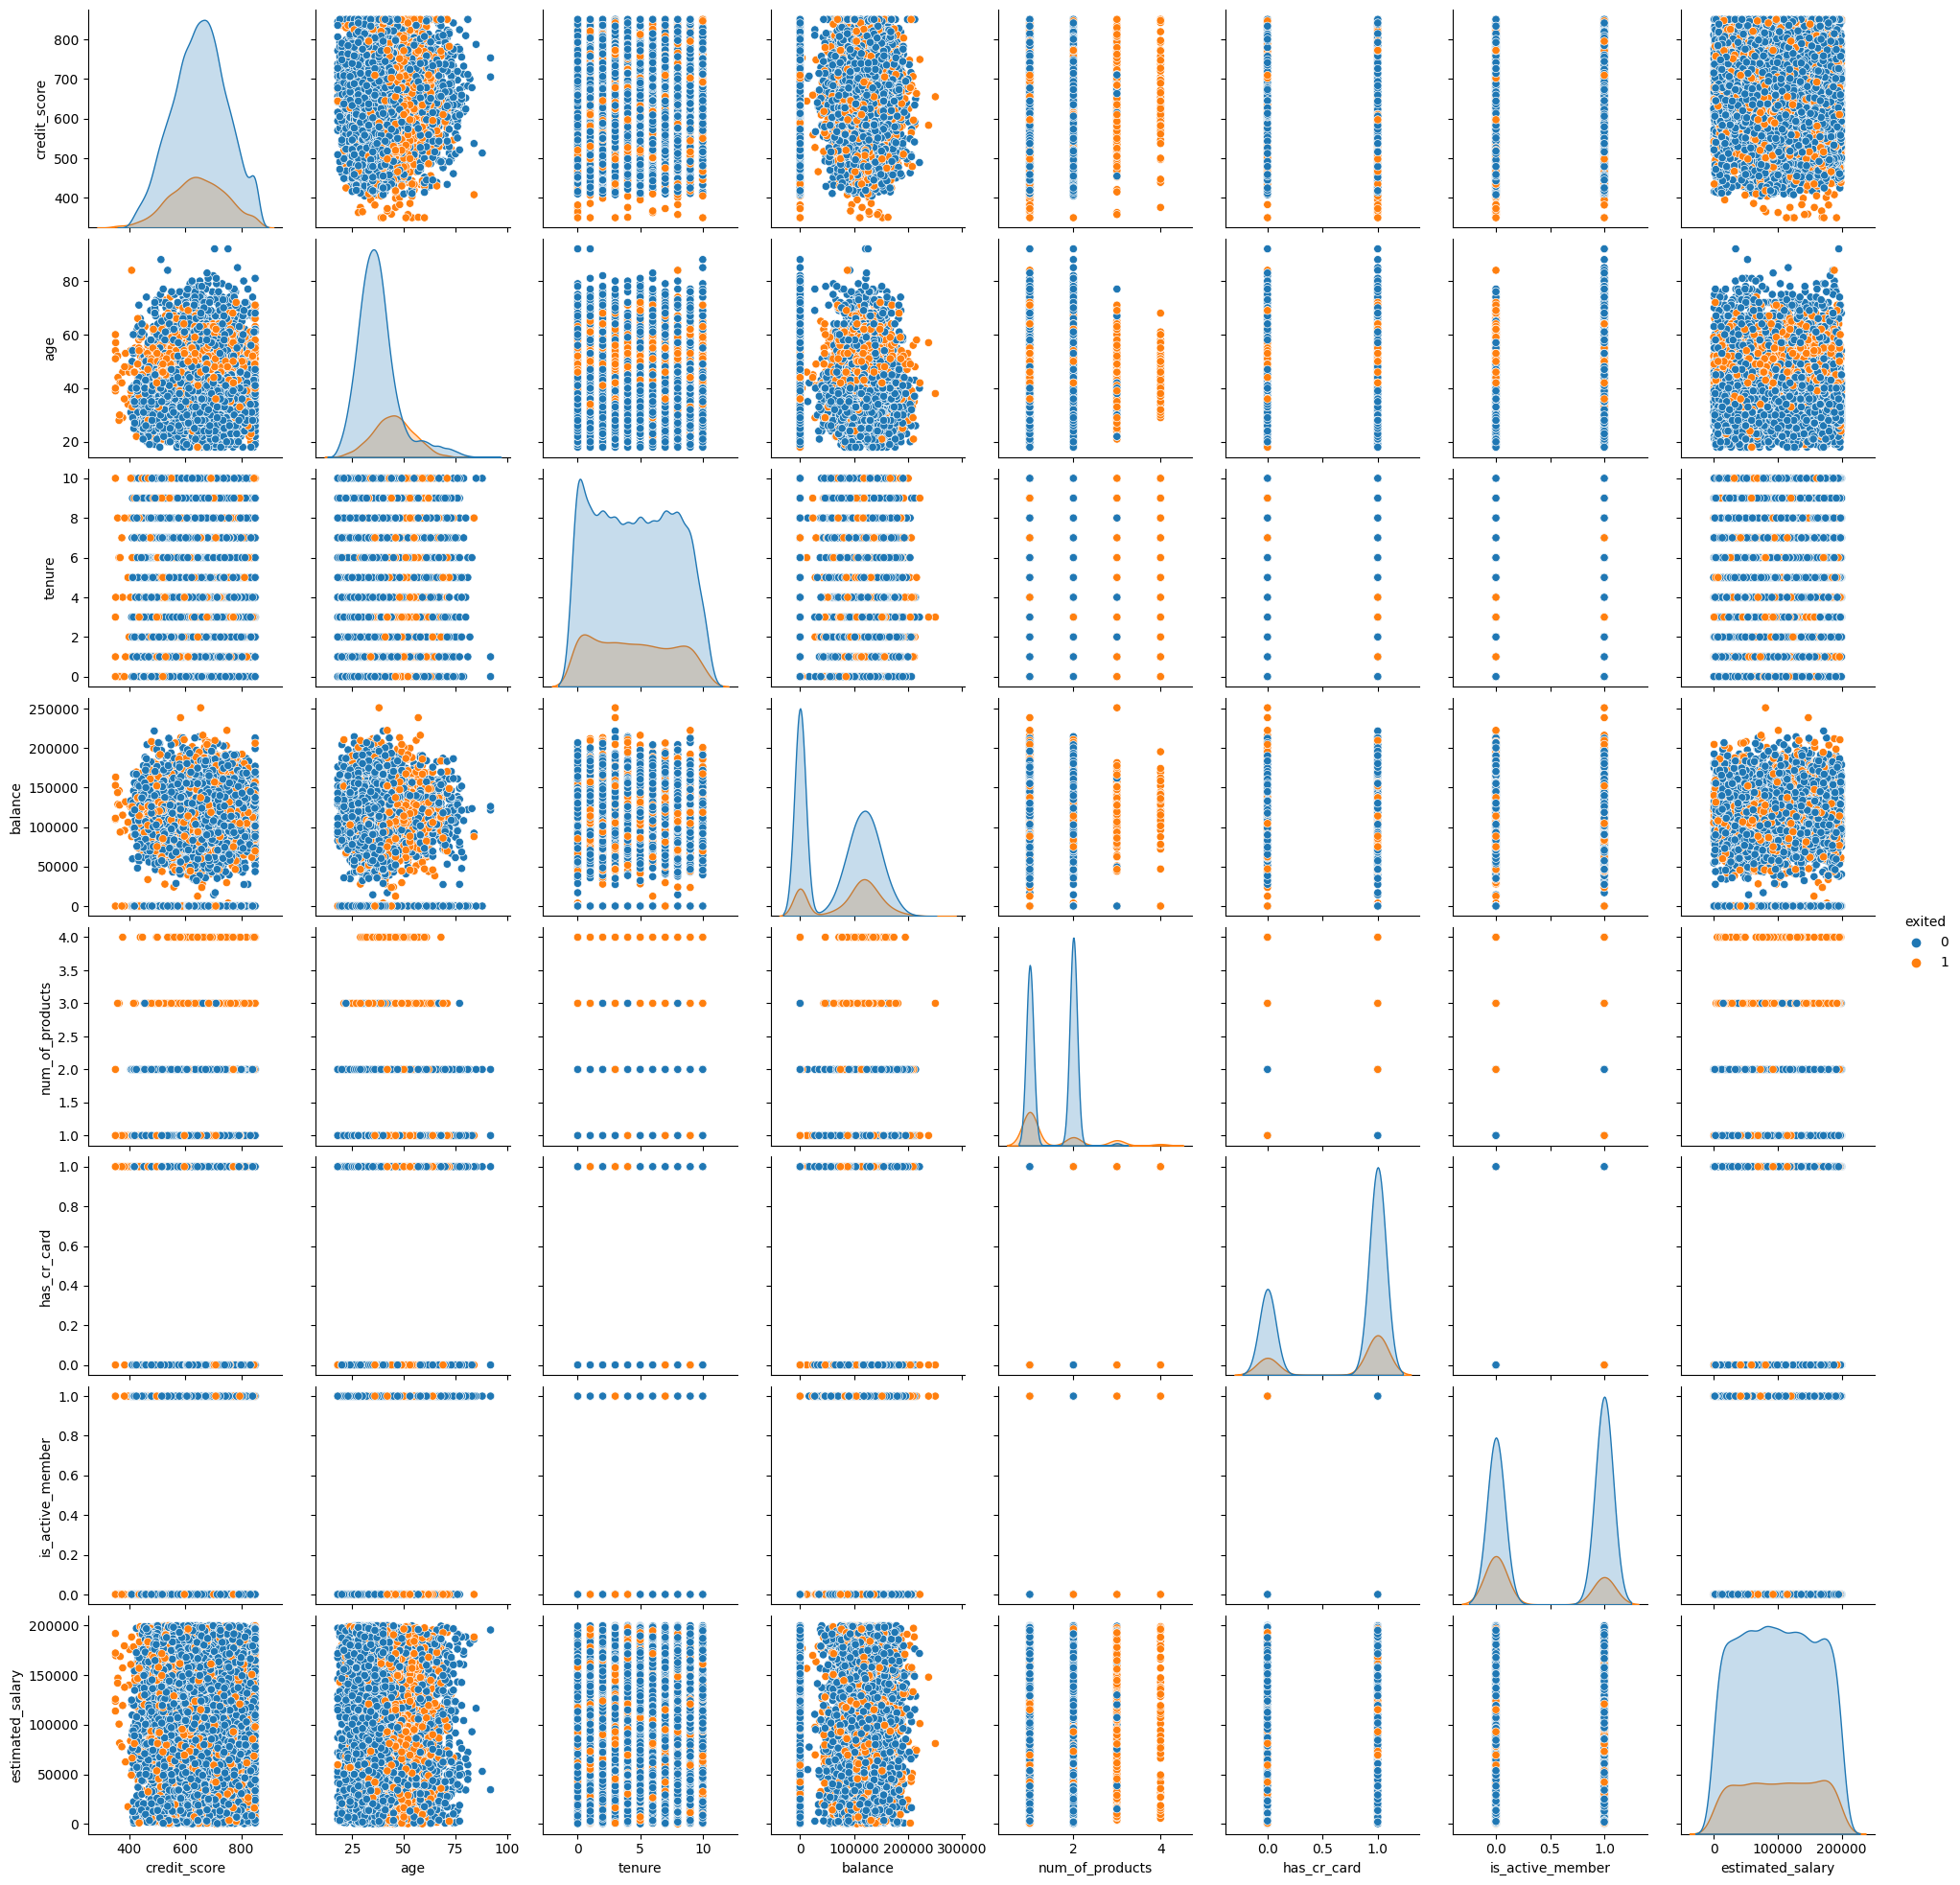

In [15]:
sns.pairplot(data[[
    'credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
    'estimated_salary', 'geography', 'gender', 'exited'
]], hue='exited');

**Более значимое влияние имеет:**
- кредитный рейтинг
- возраст
- баланс
- продукт

Остальные признаки не имеют большого влияния.


### Делим на выборки и кодируем 

In [16]:
features = data.drop(['exited'], axis=1)
target = data['exited']
features_train,  features_test, target_train, target_test = train_test_split(features, target, 
                                                                              test_size=0.2, random_state=12345)
features_train,  features_valid, target_train, target_valid = train_test_split(features_train, target_train, 
                                                                             test_size=0.2, random_state=12345)
print(features.shape, features_train.shape, features_test.shape, features_valid.shape)
print(target.shape, target_train.shape, target_test.shape, target_valid.shape)

(10000, 10) (6400, 10) (2000, 10) (1600, 10)
(10000,) (6400,) (2000,) (1600,)


In [17]:
features_train

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
6007,757,France,Male,28,3.0,75381.15,1,1,1,199727.72
3936,707,Spain,Female,32,4.0,132835.56,1,0,0,136877.24
7142,612,Spain,Female,63,2.0,131629.17,2,1,0,122109.58
5572,565,France,Male,34,6.0,0.00,1,1,1,63173.64
332,663,Germany,Male,44,2.0,117028.60,2,0,1,144680.18
...,...,...,...,...,...,...,...,...,...,...
8819,592,Germany,Male,36,10.0,123187.51,1,0,1,146111.35
1537,821,France,Female,28,8.0,0.00,1,1,1,36754.13
1408,707,France,Male,32,9.0,0.00,2,0,0,30807.02
7661,612,Germany,Male,44,2.0,115163.38,1,1,1,97677.52


In [18]:
cat = list(features_train.select_dtypes('object').columns)
num = list(features_train.select_dtypes(exclude='object').columns)

scaler = StandardScaler()
features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train[num]), columns=[num], index=features_train.index)
features_valid_scaled = pd.DataFrame(scaler.transform(features_valid[num]), columns=[num], index=features_valid.index)
features_test_scaled = pd.DataFrame(scaler.transform(features_test[num]), columns=[num], index=features_test.index)

enc = OneHotEncoder(handle_unknown='error', drop='first')
features_train_ohe = enc.fit_transform(features_train[cat])
features_valid_ohe = enc.transform(features_valid[cat])
features_test_ohe = enc.transform(features_test[cat])

ft = pd.concat([features_train_scaled, pd.DataFrame(features_train_ohe.toarray(),
                                                                   index=features_train.index)], axis=1)
fv = pd.concat([features_valid_scaled, pd.DataFrame(features_valid_ohe.toarray(),
                                                                   index=features_valid.index)], axis=1)
ftest = pd.concat([features_test_scaled, pd.DataFrame(features_test_ohe.toarray(),
                                                                   index=features_test.index)], axis=1)

In [19]:
print(features.shape, ft.shape, ftest.shape, fv.shape)
print(target.shape, target_train.shape, target_test.shape, target_valid.shape)

(10000, 10) (6400, 11) (2000, 11) (1600, 11)
(10000,) (6400,) (2000,) (1600,)


Проверяем что все работает.

In [20]:
model_0 = LogisticRegression(solver='liblinear', random_state=12345)
model_0.fit(ft, target_train)
print("Обучено!")

Обучено!


## Исследование задачи

### Модель Дерево решений

In [21]:
best_model = None
best_result = 0
for depth in range(1, 100):
    model_t = DecisionTreeClassifier(random_state=1212, criterion='entropy', max_depth=depth)
    model_t.fit(ft, target_train)
    predicted_valid = model_t.predict(fv)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model_t
        best_result = result
        
print("F1:", best_result, "Глубина дерева:", depth)

F1: 0.549407114624506 Глубина дерева: 99


In [22]:
probabilities_valid = model_t.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.6878796206528902


In [23]:
best_model = None
best_result = 0
for depth in range(1, 100):
    model_t = DecisionTreeClassifier(random_state=12345, criterion='entropy', max_depth=depth, splitter='random')
    model_t.fit(ft, target_train)
    predicted_valid = model_t.predict(fv)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model_t
        best_result = result
        
print("F1:", best_result, "Глубина дерева:", depth)

F1: 0.5588235294117647 Глубина дерева: 99


In [24]:
probabilities_valid = model_t.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.6838413602347128


### Модель Случайный лес

In [25]:
best_model = None
best_result = 0
for est in range(1, 100, 10):
    for depth in range(1,100):
        model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=est, max_depth=depth)
        model_f.fit(ft, target_train)
        predicted_valid = model_f.predict(fv)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model_f
            best_result = result
print("F1", best_result, "Количество деревьев:", est, "Глубина дерева:", depth)


F1 0.6090373280943026 Количество деревьев: 91 Глубина дерева: 99


In [26]:
probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.8522688814756572


### Модель Логистическая регрессия

In [27]:
model_l = LogisticRegression(random_state=12121, solver='lbfgs', max_iter=1000)
model_l.fit(ft, target_train) 
predicted_valid = model_l.predict(fv)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3073286052009456


In [28]:
probabilities_valid = model_l.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.7637935728808039


In [29]:
model_l = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=1000)
model_l.fit(ft, target_train) 
predicted_valid = model_l.predict(fv)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3073286052009456


In [30]:
probabilities_valid = model_l.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.7637859391181987


In [31]:
model_l = LogisticRegression(random_state=12345, solver='sag', max_iter=1000)
model_l.fit(ft, target_train) 
predicted_valid = model_l.predict(fv)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3073286052009456


In [32]:
probabilities_valid = model_l.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.7637910282932688


### Вывод

Лучшей моделью можно считать Случайный лес с количеством деревьев 91 и глубиной дерева 92

## Борьба с дисбалансом

0    0.7963
1    0.2037
Name: exited, dtype: float64


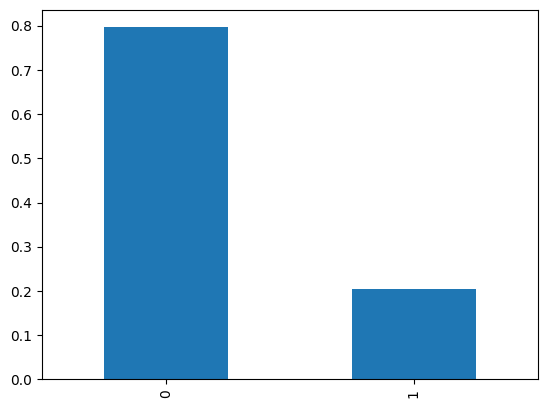

In [33]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

0    0.875625
1    0.124375
dtype: float64


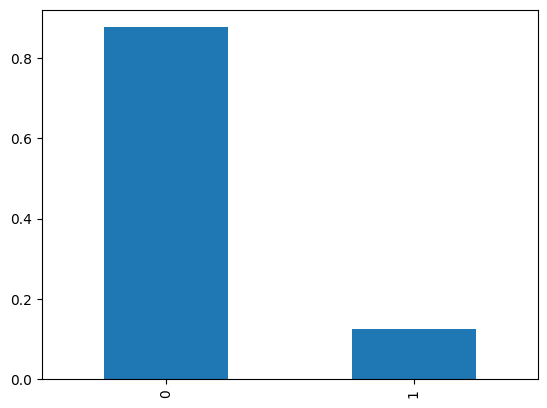

In [34]:
predicted_valid = pd.Series(model_f.predict(fv))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

In [35]:
target_pred_constant = pd.Series(0, index=target.index)
print("Accuracy", accuracy_score(target, target_pred_constant)) 

Accuracy 0.7963


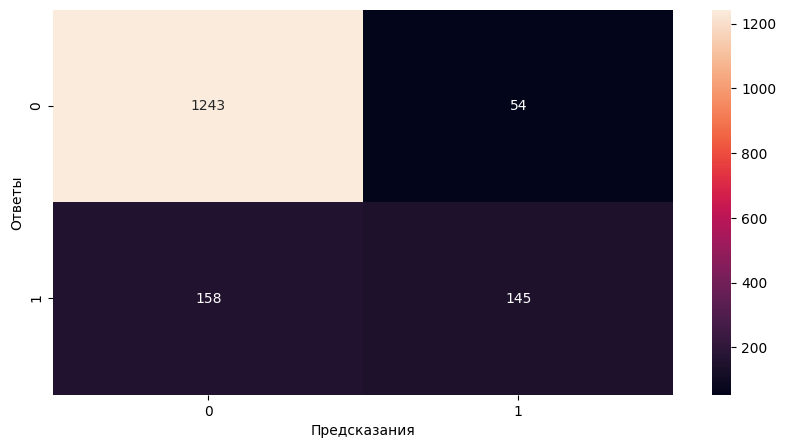

In [36]:
predicted_valid = model_f.predict(fv)
cm = confusion_matrix(target_valid, predicted_valid)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Предсказания')
plt.ylabel('Ответы');

Модель часто видит отрицательные ответы там где их нет.

### Указываем вес в нашей модели

In [37]:
model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=91, max_depth=99, 
                                 class_weight={0:1,1:4.5})
model_f.fit(ft, target_train) 
predicted_valid = model_f.predict(fv)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5782178217821782


In [38]:
probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.8445358799565386


In [39]:
model_l = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced')
model_l.fit(ft, target_train)
predicted_valid = model_l.predict(fv)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4673539518900344


In [40]:
probabilities_valid = model_l.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.767119348789158


### Увеличиваем выборку положительных ответов для баланса

In [41]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(ft, target_train, 10)
model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=91)
model_f.fit(features_upsampled, target_upsampled) 
predicted_valid = model_f.predict(fv)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6059544658493871


In [42]:
probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.8478960077966162


Видим что метрика стала выше

### Проверяем уменьшение выборки

In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1212)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(ft, target_train, 0.2)

model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=91, max_depth=99) 
model_f.fit(features_downsampled, target_downsampled) 
predicted_valid = model_f.predict(fv)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.524122807017544


После уменьшения выборки метрика F1 стала намного ниже.

### Проверяем изменение порога

In [44]:
probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold  
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

Порог = 0.00 | F1 = 0.319
Порог = 0.02 | F1 = 0.320
Порог = 0.04 | F1 = 0.324
Порог = 0.06 | F1 = 0.330
Порог = 0.08 | F1 = 0.337
Порог = 0.10 | F1 = 0.346
Порог = 0.12 | F1 = 0.350
Порог = 0.14 | F1 = 0.362
Порог = 0.16 | F1 = 0.372
Порог = 0.18 | F1 = 0.385
Порог = 0.20 | F1 = 0.398
Порог = 0.22 | F1 = 0.409
Порог = 0.24 | F1 = 0.411
Порог = 0.26 | F1 = 0.424
Порог = 0.28 | F1 = 0.431
Порог = 0.30 | F1 = 0.440
Порог = 0.32 | F1 = 0.452
Порог = 0.34 | F1 = 0.455
Порог = 0.36 | F1 = 0.469
Порог = 0.38 | F1 = 0.482
Порог = 0.40 | F1 = 0.494
Порог = 0.42 | F1 = 0.503
Порог = 0.44 | F1 = 0.507
Порог = 0.46 | F1 = 0.508
Порог = 0.48 | F1 = 0.515
Порог = 0.50 | F1 = 0.524
Порог = 0.52 | F1 = 0.538
Порог = 0.54 | F1 = 0.550
Порог = 0.56 | F1 = 0.550
Порог = 0.58 | F1 = 0.561


Мы рассмотрели порог и  0,48 нам подходит

In [45]:
probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.8493222491100305


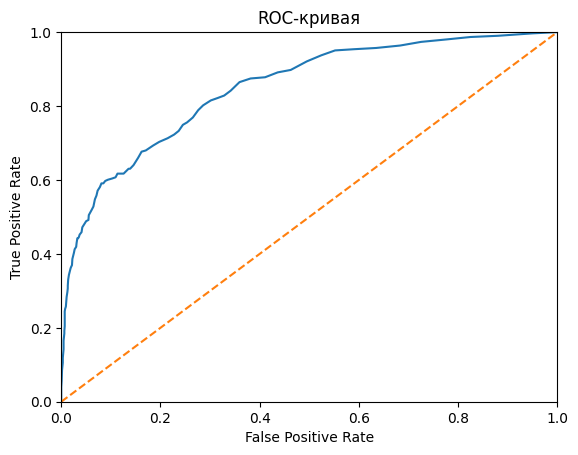

In [46]:
model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=91, max_depth=99)
model_f.fit(features_upsampled, target_upsampled) 
probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая")

plt.show()

In [47]:
model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=91, max_depth=92)
model_f.fit(features_upsampled, target_upsampled) 

probabilities_valid = model_f.predict_proba(fv)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC ROC", auc_roc)

AUC ROC 0.8478960077966162


### Вывод
Лучшим вариантом можно считать:

Модель Случайный лес с количеством деревьев 91 и глубиной дерева 99. 

С увеличение выборки на 10.

## Тестирование модели

In [48]:
features_train_test = pd.DataFrame(fv.append(ft, ignore_index = True))
target_train_test = pd.DataFrame(target_valid.append(target_train, ignore_index = True))
print(features_train_test.shape)
target_train_test.shape

(8000, 11)


(8000, 1)

In [49]:
features_upsampled_t, target_upsampled_t = upsample(ft, target_train, 8)

In [50]:
model_f = RandomForestClassifier(random_state=12121, criterion='entropy', n_estimators=91, max_depth=99) 
model_f.fit(features_upsampled_t, target_upsampled_t) 
predicted_test = model_f.predict(ftest)

print("F1:", f1_score(target_test, predicted_test))

F1: 0.5982256020278832


Как мы видим нам удалось достичь F1-меры выше 0,59